In [80]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pygraphviz as pgv
import math
import matplotlib.cm as cm

In [81]:
# Load edge and vertex data
edges = pd.read_csv('network-data/edges.csv')
vertices = pd.read_csv('network-data/vertices.csv')

In [82]:
# Create graph object
G = nx.DiGraph()

for n in range(len(vertices)):
    node = vertices["id"][n]

    # Add nodes
    G.add_node(node)

    # Add attributes
    G.node[node]["ScreenName"] = vertices["screen_name"][n]
    G.node[node]["Followers"] = vertices["followers"][n]
    G.node[node]["Friends"] = vertices["friends"][n]
    
for e in range(len(edges)):
    n1 = edges["source"][e]
    n2 = edges["target"][e]
    if n2 in G.nodes():
        G.add_edge(n1, n2)

In [83]:
[G.number_of_nodes(), G.number_of_edges()]

[100, 208]

(35.149085, 600.367915, -34.728899999999996, 572.9089)

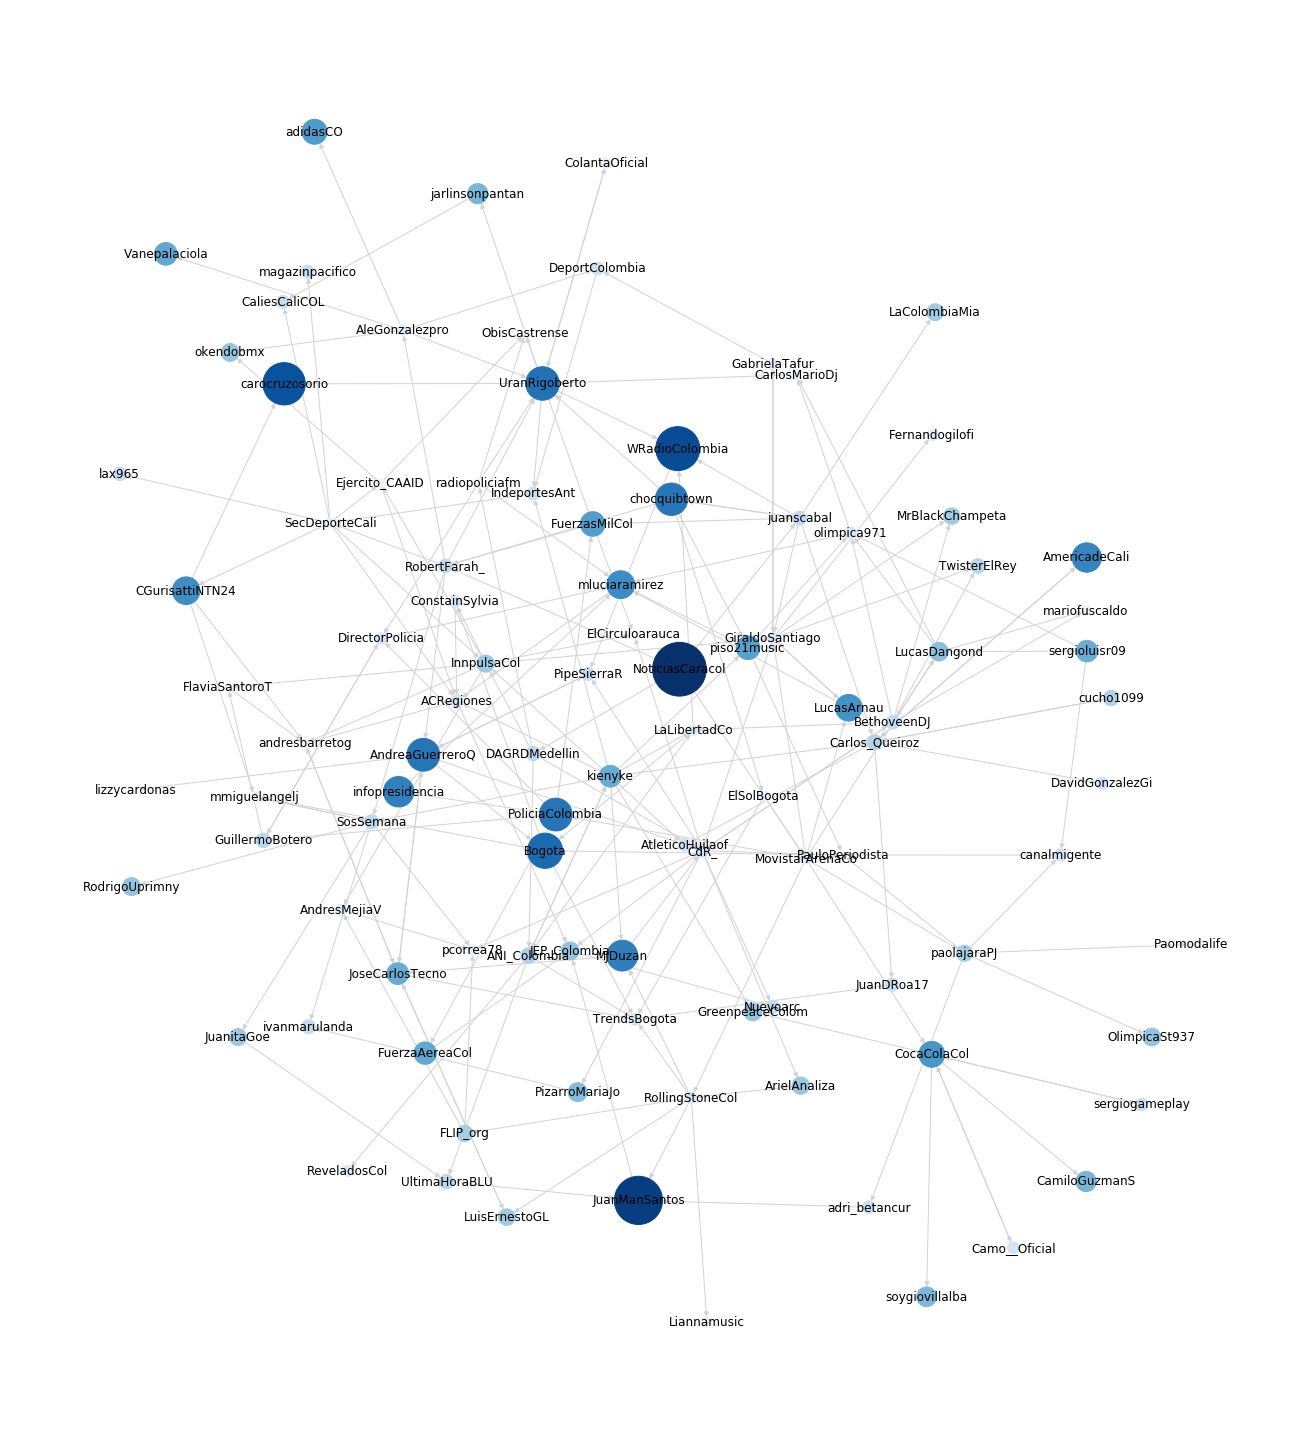

In [98]:
# Draw network

fig = plt.figure(figsize=(18,18))
        
nx.draw(G, 
        node_color=[math.log(y["Followers"]) for x,y in G.nodes(data=True)],cmap=cm.get_cmap("Blues"),
        labels = {v: G.node[v]["ScreenName"] for v in G.nodes() if "ScreenName" in G.node[v]},
                  node_size=[math.sqrt(G.node[v]["Followers"]) for v in G],
                  edge_color="lightgray",with_labels=True, pos = nx.nx_agraph.graphviz_layout(G), prog='neato')
plt.axis("tight")
plt.savefig('graph.png')

In [125]:
# Create user dataset
data = []
for n,d in G.nodes(data=True):
    data.append([n, d["Followers"], d["Friends"]])

df = pd.DataFrame(data)
df.columns=['ID', 'Followers', 'Friends']
df

,ID,Followers,Friends
0,1132257020,57599,484
1,312887235,856668,290
2,229837949,12194,352
3,436073590,25220,217
4,847591188332990466,103131,1001
...,...,...,...
95,17813487,8321076,1287
96,150909421,119065,173
97,1030200892694429696,5848,354
98,30708702,10941,721
